In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
%matplotlib inline

In [2]:
lst = sns.get_dataset_names()
lst

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
sns.load_dataset('iris')

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
np.mean(df['total_bill'])

19.78594262295082

In [5]:
np.median(df['total_bill'])

17.795

In [6]:
statistics.mode(df['total_bill'])

13.42

<AxesSubplot: >

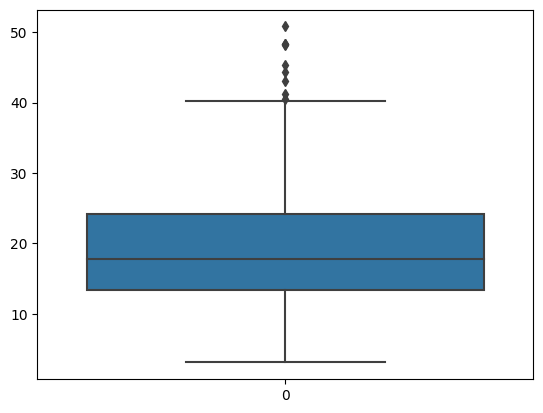

In [11]:
sns.boxplot(df['total_bill'])

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

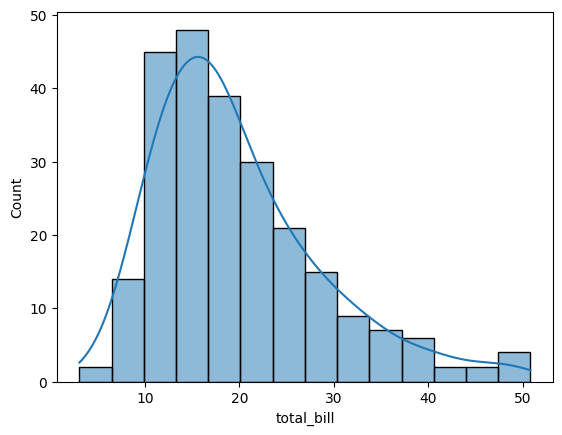

In [8]:
sns.histplot(df['total_bill'],kde=True)

In [ ]:
sns.countplot(df['day'])

In [ ]:
sns.countplot(df['sex'])
# sns.countplot(df['time'])

In [14]:
np.percentile(df['total_bill'], [25, 75])

array([13.3475, 24.1275])

In [15]:
##outliers
#define our dataset
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<AxesSubplot: ylabel='Count'>

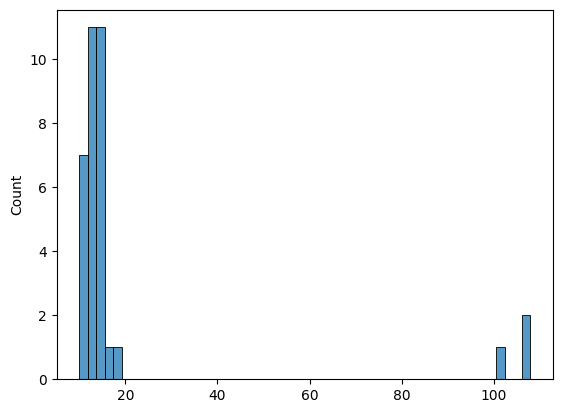

In [16]:
sns.histplot(dataset)

<AxesSubplot: >

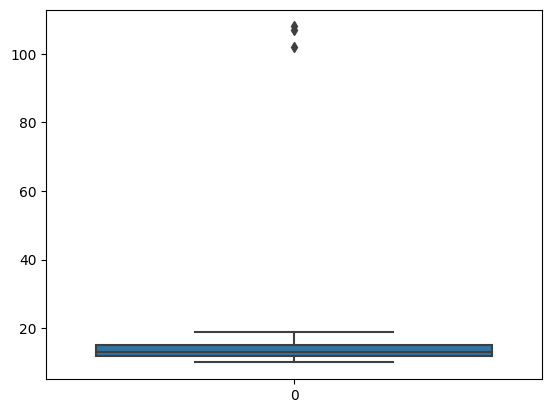

In [17]:
sns.boxplot(dataset)

In [18]:
#### zscore
outlires = []
def detect_out(data):
    threshold = 3 ## 3 standard deviation 
    mean =np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outlires.append(i)
    return outlires

In [ ]:
detect_out(dataset)

In [19]:
### outlier using IQR
# sort data
# calculate Q1 and Q3
#IQR (Q1- Q3)
# Find lower fence (q1 - 1.5*(iqr))
# Find upper fence (q3 + 1.5*(iqr))

In [20]:
dataset = sorted(dataset)
q1,q3 = np.percentile(dataset, [25,75])
iqr = q3 - q1
lf = (q1 - (1.5*iqr))
uf = (q3 + (1.5*iqr))
outlier = []
for i in dataset:
    if i >= lf and i <= uf:
        pass
    else:
        outlier.append(i)
print(outlier)
# print(lf,uf,iqr)

[102, 107, 108]


In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df.corr()

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_18184\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [24]:
df.corr(method='spearman')

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_18184\1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


In [25]:
df.corr(method='pearson')

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_18184\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [26]:
df.cov()

C:\Users\Pallavi Prajapati\AppData\Local\Temp\ipykernel_18184\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591
